## LAB 6 FB-33 Rudyi Artem


In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean

## Завдання 1:

1.Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу
результатів.
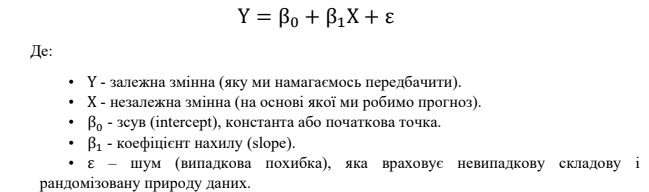

In [16]:
x = np.random.randint(-10, high = 10, size = 100)
k = 3
y = k*x+5
shum = np.random.randint(-10, high = 10, size = 100)
y_shum = y + shum


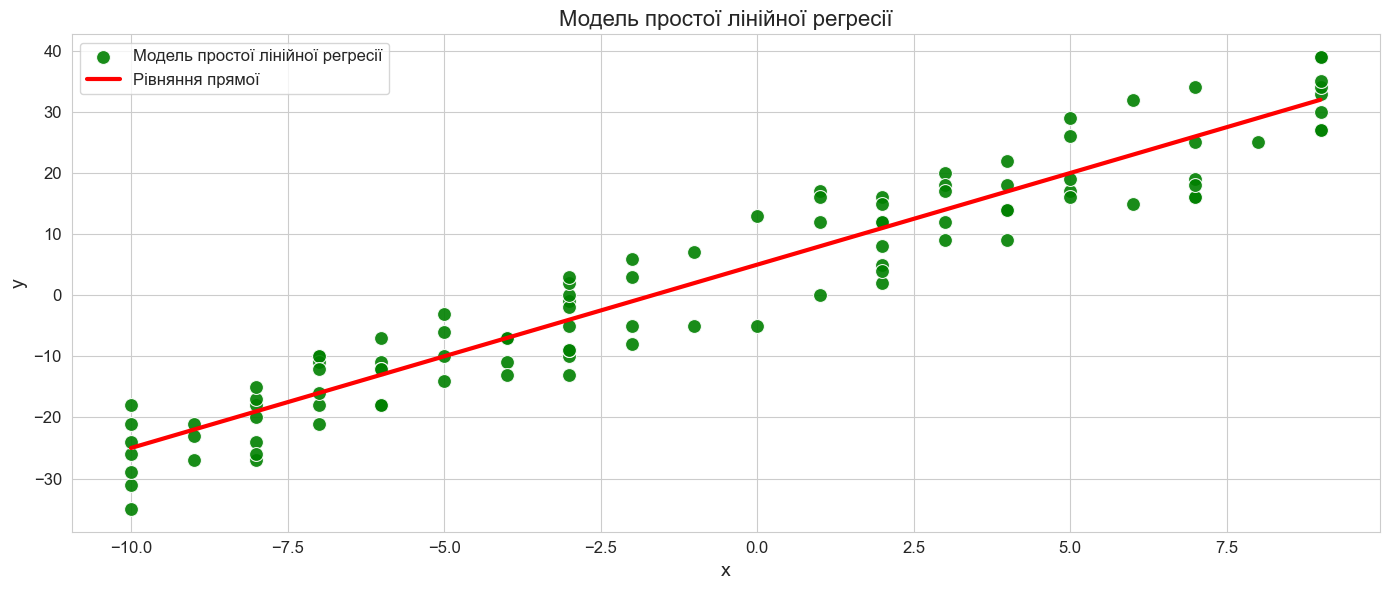

In [17]:
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")  
sns.scatterplot(x=x, y=y_shum, label='Модель простої лінійної регресії', color='green', alpha=0.9, s=100) 
sns.lineplot(x=x, y=y, color='red', label='Рівняння прямої', linewidth=3) 
plt.xlabel('x', fontsize=14)  
plt.ylabel('y', fontsize=14)  
plt.title('Модель простої лінійної регресії', fontsize=16)  
plt.legend(fontsize=12)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.tight_layout()  
plt.show()

2.Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k та b.
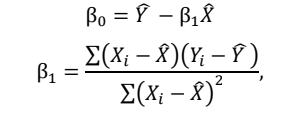

In [24]:
def mnk(x , y):
    x_mn = mean(x)
    y_mn = mean(y)

    k_chysel = np.sum((x - x_mn)*(y - y_mn))
    k_znamenyk = np.sum((x - x_mn)**2)
    k = k_chysel / k_znamenyk

    b = y_mn - k * x_mn

    return k, b

k_mnk, b_mnk = mnk(x, y_shum)
print(f"k_mnk:{k_mnk}  b_mnk:{b_mnk}")

    

k_mnk:2.9942627653471026  b_mnk:3.9942627653471026


3.Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).


In [25]:
k_poly, b_poly = np.polyfit(x, y_shum, 1)

print(f"k_poly:{k_poly} b_poly:{b_poly}")

k_poly:2.9942627653471034 b_poly:4.5542627653471


Видно, що моїм методом і через функцію працюють майже однаково, але зсув трішки відрізняється

4.Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

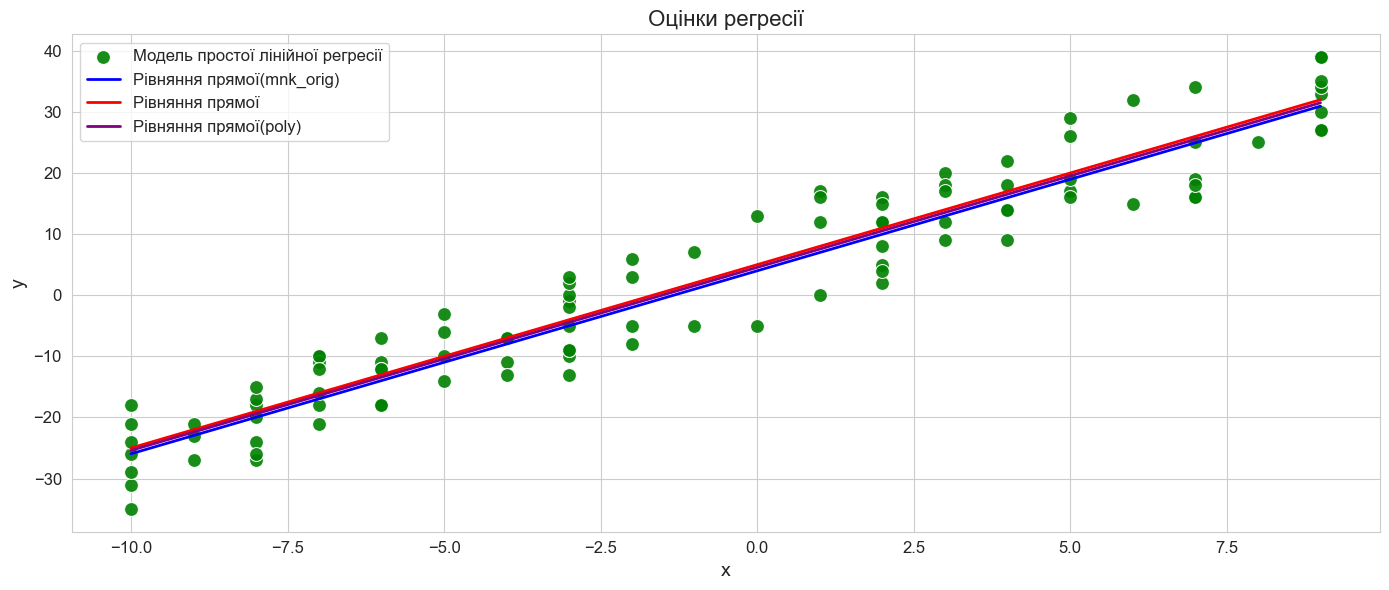

In [26]:
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")  
sns.scatterplot(x=x, y=y_shum, label='Модель простої лінійної регресії', color='green', alpha=0.9, s=100) 
sns.lineplot(x=x, y=k_mnk*x + b_mnk, color='blue', label='Рівняння прямої(mnk_orig)', linewidth=2) 
sns.lineplot(x=x, y=y, color='red', label='Рівняння прямої', linewidth=2) 
sns.lineplot(x=x, y=k_poly*x + b_poly, color='purple', label='Рівняння прямої(poly)', linewidth=2) 
plt.xlabel('x', fontsize=14)  
plt.ylabel('y', fontsize=14)  
plt.title('Оцінки регресії', fontsize=16)  
plt.legend(fontsize=12)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.tight_layout()  
plt.show()

## Завдання 2:

1.Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [32]:
def grad(x, y, learning_rate=0.001, n_iter=1000):
    b_0 = 0  
    b_1 = 0  
    n = len(x)  
    loses = []
    for _ in range(n_iter):
        y_pred = b_0 + b_1 * x

        
        grad_b_0 = (-2 / n) * np.sum(y - y_pred)
        grad_b_1 = (-2 / n) * np.sum(x * (y - y_pred))

        
        b_0 = b_0 - learning_rate * grad_b_0
        b_1 = b_1 - learning_rate * grad_b_1
        
        MSE = (1/n) * np.sum((y - b_0 - b_1 * x )**2)
        loses.append(MSE)
    return b_0, b_1 , loses  

b_grad, k_grad, loses  = grad(x, y_shum)
print(f"k_grad: {k_grad} b_grad: {b_grad} loses{loses}")

k_grad: 2.975253227375313 b_grad: 3.8910454087480155 loses[np.float64(303.11762339305596), np.float64(267.96872544934075), np.float64(237.67366005476492), np.float64(211.56068603158224), np.float64(189.05103280816172), np.float64(169.6460330398766), np.float64(152.91603610956366), np.float64(138.49085602907417), np.float64(126.05154137671278), np.float64(115.32328429727461), np.float64(106.06931091537894), np.float64(98.08561733188351), np.float64(91.1964341724267), np.float64(85.25031885454045), np.float64(80.11678869541045), np.float64(75.6834200064961), np.float64(71.8533486811866), np.float64(68.54311670778654), np.float64(65.680816730843), np.float64(63.20449341012951), np.float64(61.06076603580594), np.float64(59.20364177731038), np.float64(57.59349318176585), np.float64(56.196177189331095), np.float64(54.982276079173445), np.float64(53.92644347054013), np.float64(53.00684083902297), np.float64(52.20465202047157), np.float64(51.50366490885739), np.float64(50.889911048266214), np.

2.Додайте отриману лінію регресії на загальний графік

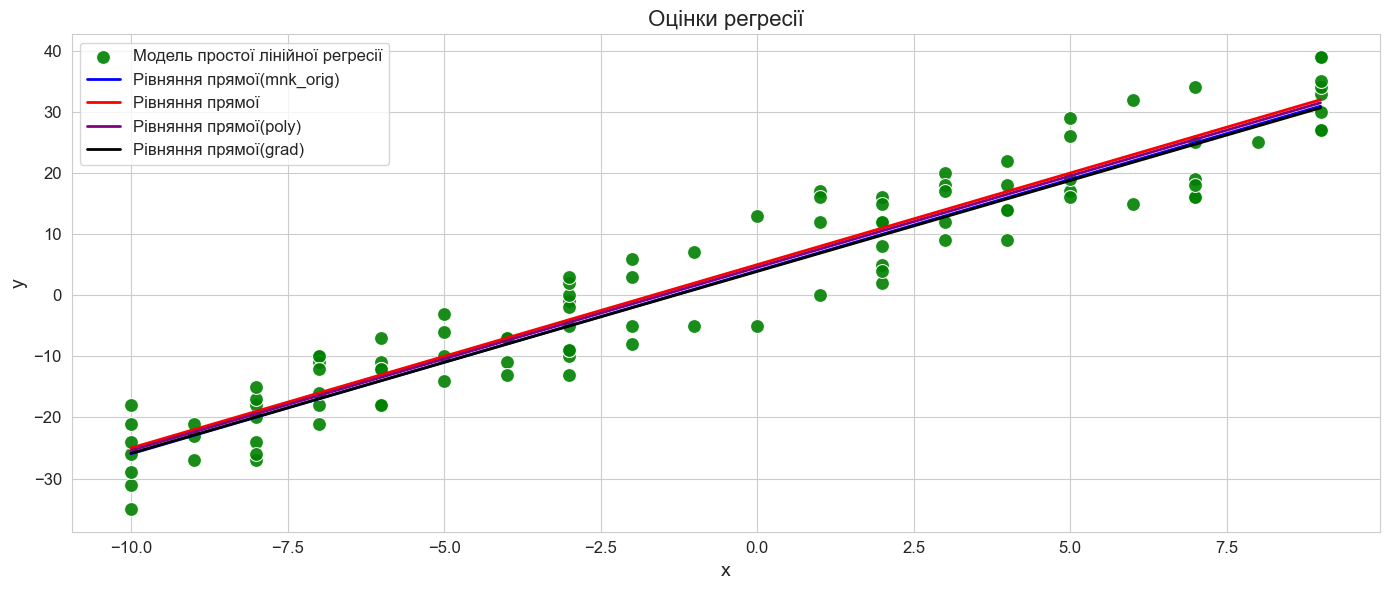

In [33]:
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")  
sns.scatterplot(x=x, y=y_shum, label='Модель простої лінійної регресії', color='green', alpha=0.9, s=100) 
sns.lineplot(x=x, y=k_mnk*x + b_mnk, color='blue', label='Рівняння прямої(mnk_orig)', linewidth=2) 
sns.lineplot(x=x, y=y, color='red', label='Рівняння прямої', linewidth=2) 
sns.lineplot(x=x, y=k_poly*x + b_poly, color='purple', label='Рівняння прямої(poly)', linewidth=2) 
sns.lineplot(x=x, y=k_grad*x + b_grad, color='black', label='Рівняння прямої(grad)', linewidth=2)
plt.xlabel('x', fontsize=14)  
plt.ylabel('y', fontsize=14)  
plt.title('Оцінки регресії', fontsize=16)  
plt.legend(fontsize=12)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.tight_layout()  
plt.show()

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки
   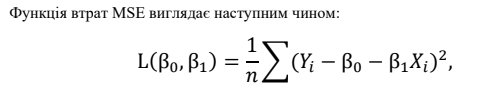
   

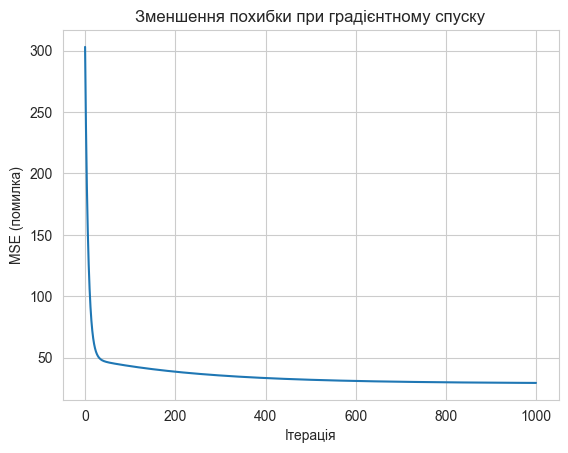

In [36]:
plt.plot(loses)
plt.xlabel('Ітерація')
plt.ylabel('MSE (помилка)')
plt.title('Зменшення похибки при градієнтному спуску')
plt.show()

4. Порівняйте отримані результати з результатами попереднього завдання

Усі способи дали майже однаковий результат. 